<a href="https://colab.research.google.com/github/yunhyeongil/docs-l10n/blob/master/yolo_detect_%EC%88%98%EC%A0%95_ipynb%EC%9D%98_%EC%9C%A4%ED%98%95%EC%9D%BC_%EC%B5%9C%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# colab 한글 # 아래 plot legend 한글 깨지면 런타임 다시시작

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=11)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


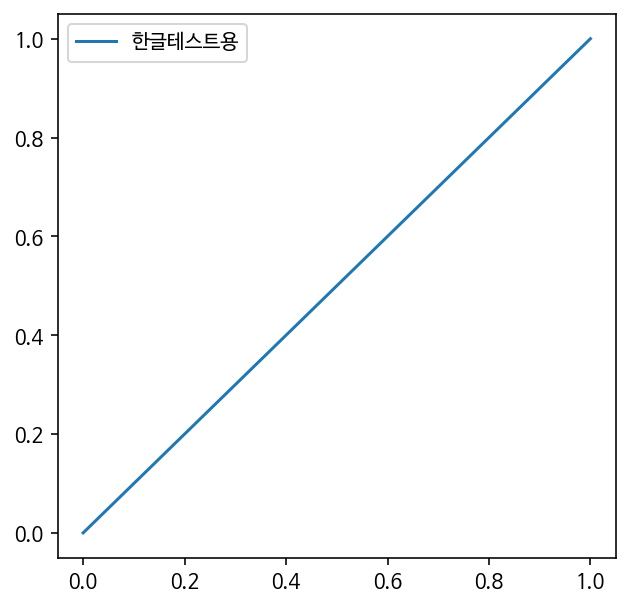

In [3]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 8294, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8294 (delta 2), reused 0 (delta 0), pack-reused 8288
Receiving objects: 100% (8294/8294), 9.21 MiB | 33.20 MiB/s, done.
Resolving deltas: 100% (5742/5742), done.


In [5]:
%cd yolov5
!pwd

/content/yolov5
/content/yolov5


In [6]:
% pip install -r requirements.txt # install

     |████████████████████████████████| 636 kB 9.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
%cd /content/

/content


In [9]:
!unzip -u "/content/drive/MyDrive/dataset3/2020-02-119.상품이미지_sample.zip" -d "/content/2020-02-119.상품이미지_sample"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_6_meta.xml  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_7.jpg  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_7.xml  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_7_meta.xml  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_8.jpg  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_8.xml  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_8_meta.xml  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_9.jpg  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/25097_브레드가든컬러슈가파우더60G/25097_30_m_9.xml  
  inflating: /content/2020-02-119.상품이미지_sample/미분류/

In [10]:
import os
import shutil
def make_dir(name):
    if not os.path.isdir(name):
        os.makedirs(name)
        print(name, "폴더가 생성되었습니다.")
    else:
        print("해당 폴더가 이미 존재합니다.")

In [11]:
%pwd

'/content'

In [12]:
make_dir('images')

images 폴더가 생성되었습니다.


In [13]:
# 하위폴더 리스트
from pprint import pprint
import os
data_path_li = []
for (path, dir, files) in os.walk('/content/2020-02-119.상품이미지_sample'):
  data_path_li.append(path)

pprint(data_path_li)

['/content/2020-02-119.상품이미지_sample',
 '/content/2020-02-119.상품이미지_sample/통조림_안주',
 '/content/2020-02-119.상품이미지_sample/통조림_안주/10138_동원참치라이트스탠다드200G',
 '/content/2020-02-119.상품이미지_sample/면류',
 '/content/2020-02-119.상품이미지_sample/면류/10101_농심오징어짬뽕컵67G',
 '/content/2020-02-119.상품이미지_sample/주류',
 '/content/2020-02-119.상품이미지_sample/주류/10054_순하리소다톡바나나355ML',
 '/content/2020-02-119.상품이미지_sample/홈클린',
 '/content/2020-02-119.상품이미지_sample/홈클린/10180_크리오)골드디비누',
 '/content/2020-02-119.상품이미지_sample/생활용품',
 '/content/2020-02-119.상품이미지_sample/생활용품/10285_콩맥스전자담배용크리닝면봉',
 '/content/2020-02-119.상품이미지_sample/디저트',
 '/content/2020-02-119.상품이미지_sample/디저트/10242_Dole후룻볼슬라이스복숭아198g',
 '/content/2020-02-119.상품이미지_sample/소스',
 '/content/2020-02-119.상품이미지_sample/소스/10179_해찬들고기전용쌈장450G',
 '/content/2020-02-119.상품이미지_sample/상온HMR',
 '/content/2020-02-119.상품이미지_sample/상온HMR/10184_오뚜기옥수수스프80G',
 '/co

In [14]:
import glob
import shutil
import os

def jpg_cp_otherdir(src_dir,dst_dir):
  # src_dir # 복사할 경로
  # dst_dir # 옮길 경로
  for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
      shutil.copy(jpgfile, dst_dir)

In [15]:
# images 폴더로 .jpg 복사
for i in data_path_li:
  jpg_cp_otherdir(i, "/content/images")

In [16]:
# images 안의 파일 수
import os 
image_li = os.listdir("/content/images") 
print (len(image_li))

2160


In [17]:
make_dir('annotations')

annotations 폴더가 생성되었습니다.


In [18]:
import glob
import shutil
import os

def xml_cp_otherdir(src_dir,dst_dir):
  # src_dir # 복사할 경로
  # dst_dir # 옮길 경로
  for xmlfile in glob.iglob(os.path.join(src_dir, "*.xml")):
    if xmlfile[-5:] == 'a.xml':
      continue
    else:
      shutil.copy(xmlfile, dst_dir)

In [19]:
# annotations 폴더로 .xml 복사
for i in data_path_li:
  xml_cp_otherdir(i, "/content/annotations")

In [20]:
# xml 안의 파일 수
import os 
xml_li = os.listdir("/content/annotations") 
print (len(xml_li))

2160


In [21]:
print(f'샘플 이미지의 총 개수 : {len(image_li)}, xml 총 개수 : {len(xml_li)}')

샘플 이미지의 총 개수 : 2160, xml 총 개수 : 2160


In [22]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [23]:
import re
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = re.sub("\!|\'|\?|\)","",subelem.text)
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [24]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"동원참치라이트스탠다드200G": 0,
                           "크라운콘초66G": 1,
                           "농심오징어짬뽕컵67G": 2,
                           "콩맥스전자담배용크리닝면봉": 3,
                            "오뚜기옥수수스프80G": 4,
                            "크리오골드디비누": 5,
                            "토핑오트_애플시나몬": 6,
                            "애경케라시스데미지클리닉오리지널샴푸":7,
                            "해찬들고기전용쌈장450G":8,
                            "브레드가든컬러슈가파우더60G":9,
                            "동아제약가그린제로100ML":10,
                            "유어스광동어성초500ml":11,
                            "Dole후룻볼슬라이스복숭아198g":12,
                            "네슬레네슬레핫쵸코오리지날24G":13,
                            "순하리소다톡바나나355ML":14}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [25]:
# Get the annotations
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

100%|██████████| 2160/2160 [00:00<00:00, 6680.27it/s]


In [26]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 160855 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


1541.8080000000002 552.7799999999999 2551.7520000000004 2214.108
543.816 569.2140000000002 1553.7600000000002 2221.5780000000004


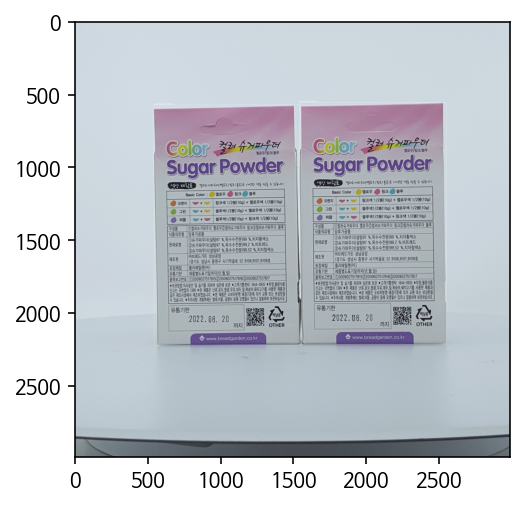

In [27]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))
font=ImageFont.truetype('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',10)

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        print(x0, y0, x1, y1)
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))],font=font,encoding='utf8')
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r", encoding='utf8') as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [28]:
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [29]:
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

In [30]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

In [31]:
%mv annotations labels
%cd yolov5 

/content/yolov5


In [33]:
# 먼저 data.yaml 파일을 colab쪽에 올려야함.
import yaml

with open('/content/data.yaml', 'r') as f:
  data = yaml.load(f)

print(data)

data['train'] = '/content/images/train'
data['val'] = '/content/images/val'
data['test'] = '/content/images/test'
data['names'] = ["동원참치라이트스탠다드200G",
                           "크라운콘초66G",
                           "농심오징어짬뽕컵67G",
                           "콩맥스전자담배용크리닝면봉",
                            "오뚜기옥수수스프80G",
                            "크리오골드디비누",
                            "토핑오트_애플시나몬",
                            "애경케라시스데미지클리닉오리지널샴푸",
                            "해찬들고기전용쌈장450G",
                            "브레드가든컬러슈가파우더60G",
                            "동아제약가그린제로100ML",
                            "유어스광동어성초500ml",
                            "Dole후룻볼슬라이스복숭아198g",
                            "네슬레네슬레핫쵸코오리지날24G",
                            "순하리소다톡바나나355ML"]
data['nc']=15

with open('/content/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['크라운콘초66G', 'Dole후룻볼슬라이스복숭아198g', '농심오징어짬뽕컵67G', '유어스광동어성초500ml'], 'nc': 4, 'test': 'C:/Users/User/prepare/final-project/final_p/images/test', 'train': 'C:/Users/User/prepare/final-project/final_p/images/train', 'val': 'C:/Users/User/prepare/final-project/final_p/images/val'}
{'names': ['동원참치라이트스탠다드200G', '크라운콘초66G', '농심오징어짬뽕컵67G', '콩맥스전자담배용크리닝면봉', '오뚜기옥수수스프80G', '크리오골드디비누', '토핑오트_애플시나몬', '애경케라시스데미지클리닉오리지널샴푸', '해찬들고기전용쌈장450G', '브레드가든컬러슈가파우더60G', '동아제약가그린제로100ML', '유어스광동어성초500ml', 'Dole후룻볼슬라이스복숭아198g', '네슬레네슬레핫쵸코오리지날24G', '순하리소다톡바나나355ML'], 'nc': 15, 'test': '/content/images/test', 'train': '/content/images/train', 'val': '/content/images/val'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [34]:
%pwd

'/content/yolov5'

In [36]:
# mart_test_data.yaml 으로 이름 변경 후 /content/yolov5/data 밑으로 파일이동 후 실행
!python train.py --img 416 --cfg yolov5s.yaml --hyp hyp.scratch.yaml --batch 16 --epochs 10 --data mart_test_data.yaml --weights yolov5s.pt --workers 24 --name yolo_mart_test_det

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=mart_test_data.yaml, hyp=hyp.scratch.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=runs/train, entity=None, name=yolo_mart_test_det, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-303-g3bef77f torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale

In [ ]:
%cd /content/yolov5/

from glob import glob

img_list = glob('/content/images/test/*.jpg')

print(len(img_list))

In [ ]:
img_list[1]

In [ ]:
from IPython.display import Image
import os

val_img_path = img_list[105]

weights_path = '/content/yolov5/runs/train/weights/best.pt'

!python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}"

In [ ]:
detect_img_path = '/content/yolov5/runs/detect/exp5'

Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))